In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os 
import pandas as pd
import numpy as np 

In [2]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/Stock%20market%20data/dow.csv', delimiter=';', nrows = nRowsRead)
df1.dataframeName = 'dow.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30 rows and 5 columns


In [4]:
df1.head(5)

,Symbol,Company,Company Name,Industry,Exchange
0,AAPL,Apple,Apple Inc.,Information technologies,NASDAQ
1,AXP,American Express,American Express Company,Financial services,NYSE
2,BA,Boeing,The Boeing Company,Aerospace and defense,NYSE
3,CAT,Caterpillar,Caterpillar Inc.,Construction and mining equipment,NYSE
4,CSCO,Cisco Systems,"Cisco Systems, Inc.",Information technologies,NASDAQ


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__

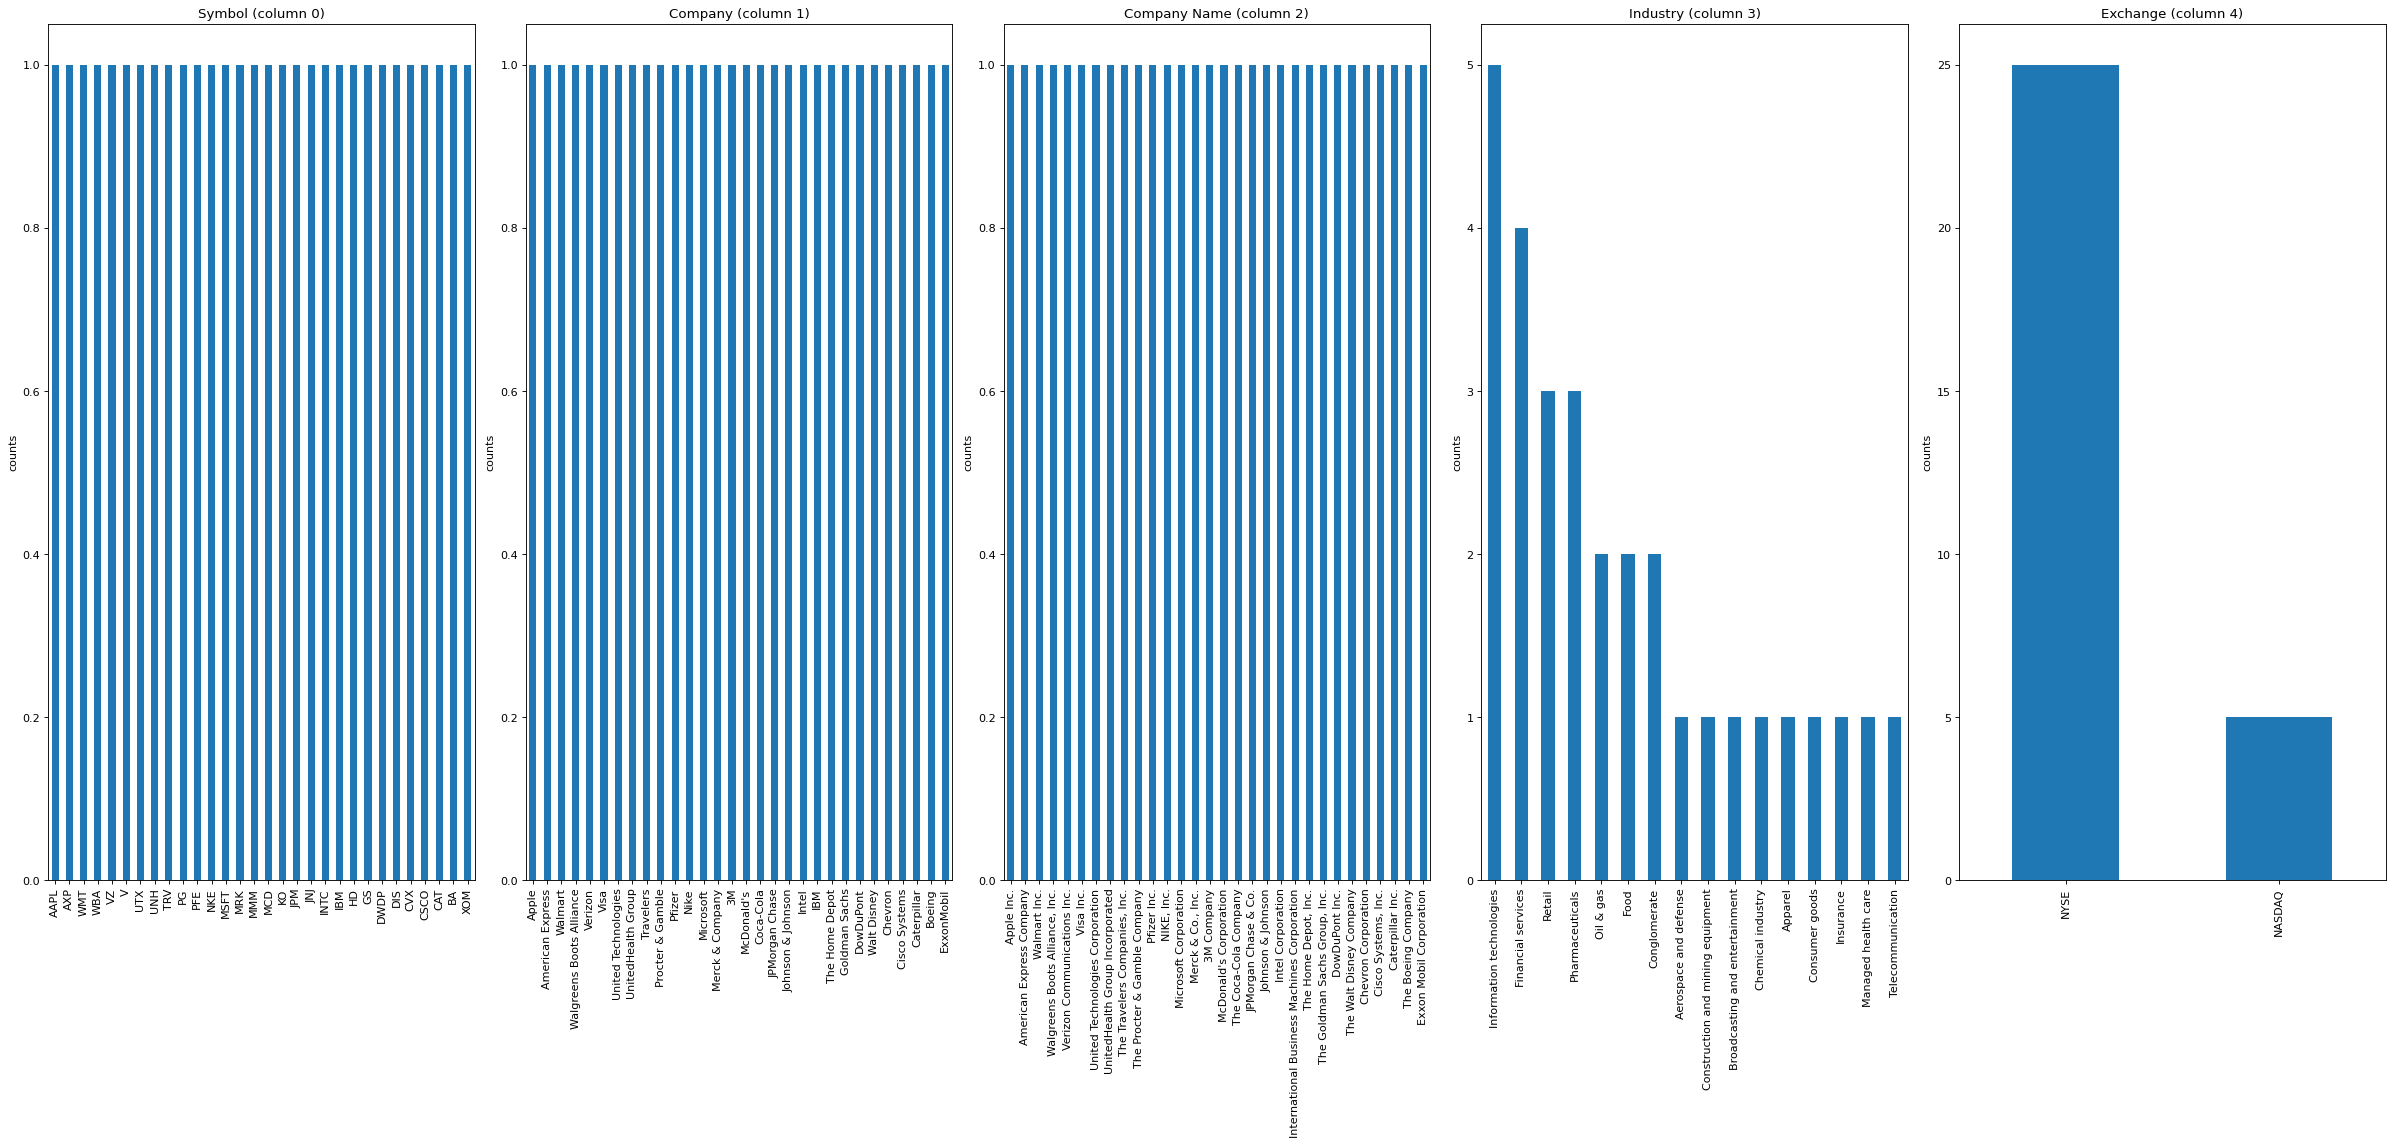

In [5]:
plotPerColumnDistribution(df1, 10, 5)

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/Stock%20market%20data/nasdaq100.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'nasdaq100.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 103 rows and 8 columns


In [7]:
df2.head(5)

,Symbol,Name,lastsale,netchange,pctchange,share_volume,Nasdaq100_points,Unnamed: 7
0,ATVI,Activision Blizzard Inc,68.8800,-0.1700,-0.25,2725378,-0.1,NaN
1,ADBE,Adobe Inc.,244.7600,-1.0000,-0.41,1446412,-0.4,NaN
2,ALXN,Alexion Pharmaceuticals Inc.,118.5850,6.5150,5.81,1094479,1.3,NaN
3,ALGN,Align Technology Inc.,228.0750,6.8750,3.11,842126,0.5,NaN
4,GOOG,Alphabet Inc.,1077.2836,0.5136,0.05,740933,0.2,NaN


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


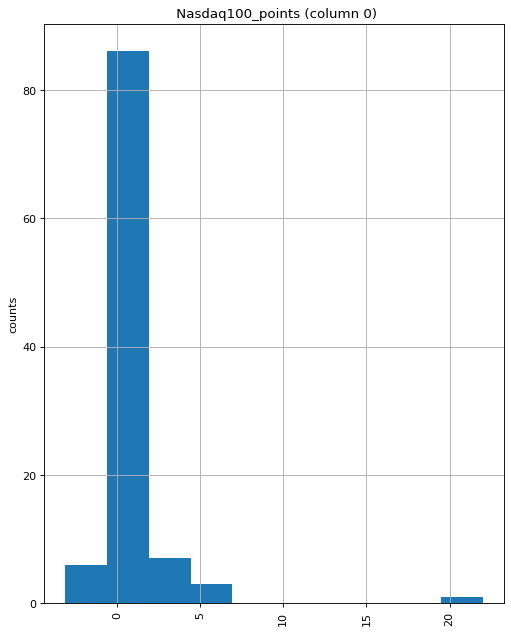

In [8]:
plotPerColumnDistribution(df2, 10, 5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


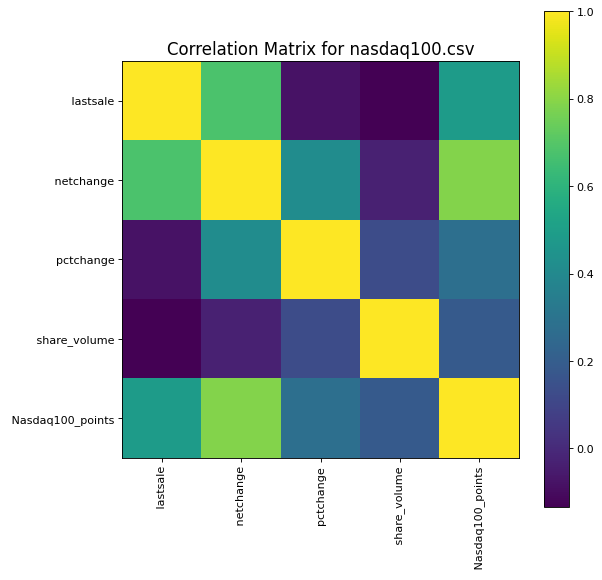

In [9]:
plotCorrelationMatrix(df2, 8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


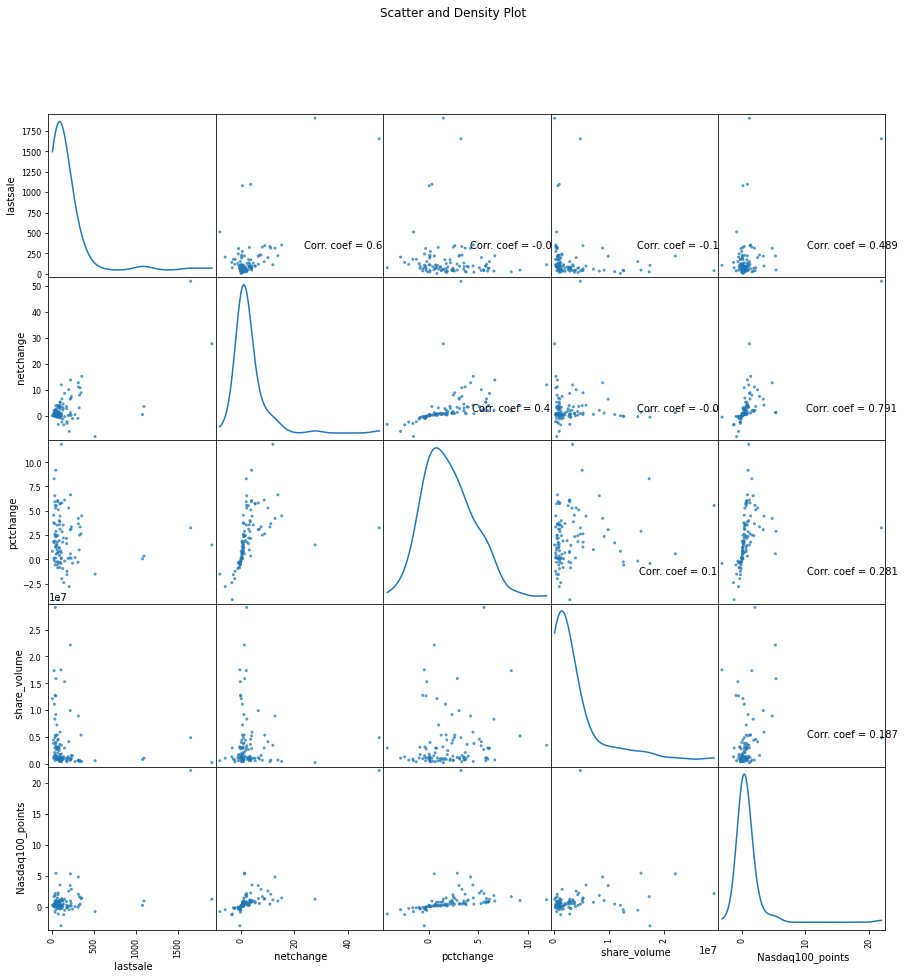

In [10]:
plotScatterMatrix(df2, 15, 10)

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df3 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/Stock%20market%20data/sp500.csv', delimiter=';', nrows = nRowsRead)
df3.dataframeName = 'sp500.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 505 rows and 7 columns


In [12]:
df3.head(5)

,Symbol,Company,Sector,SubIndustry,Location,Date first added[3][4],CIK
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",31/03/1964,1800
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",31/12/2012,1551152
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",31/05/2018,815094
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06/07/2011,1467373


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


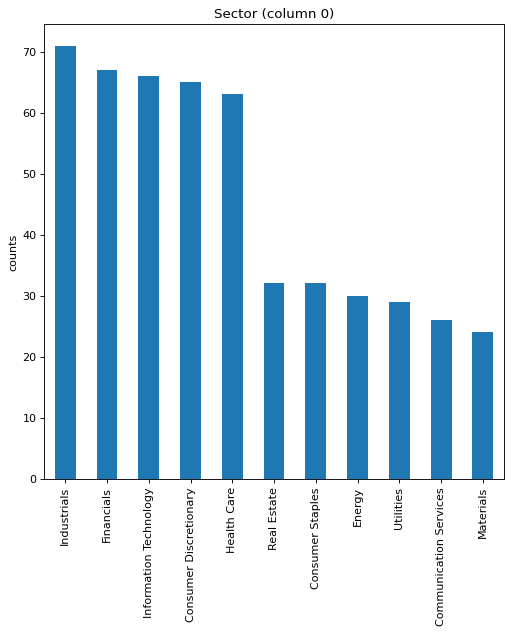

In [13]:
plotPerColumnDistribution(df3, 10, 5)